# Import Dependencies

In [1]:
import pandas as pd
import numpy as np


## Get Data from MonarchNet

### Citation: 
#### *GBIF.org (24 February 2024) GBIF Occurrence Download  https://doi.org/10.15468/dl.rsu3ha*

In [24]:
# Read the CSV data with appropriate separator and skip initial spaces
file_path = "C:\\Users\\12039\\Documents\\Capstone Project\\Monarchs\\0015535-240216155721649.csv"
monarch_sightings = pd.read_csv(file_path, sep="\t", skipinitialspace=True)

# Rename columns to meaningful names
monarch_sightings.columns = ["gbifID", "datasetKey", "occurrenceID", "kingdom", "phylum", "class", "order", "family", 
                "genus", "species", "infraspecificEpithet", "taxonRank", "scientificName", 
                "verbatimScientificName", "verbatimScientificNameAuthorship", "countryCode", "locality", 
                "stateProvince", "occurrenceStatus", "individualCount", "publishingOrgKey", "decimalLatitude", 
                "decimalLongitude", "coordinateUncertaintyInMeters", "coordinatePrecision", "elevation", 
                "elevationAccuracy", "depth", "depthAccuracy", "eventDate", "day", "month", "year", "taxonKey", 
                "speciesKey", "basisOfRecord", "institutionCode", "collectionCode", "catalogNumber", "recordNumber", 
                "identifiedBy", "dateIdentified", "license", "rightsHolder", "recordedBy", "typeStatus", 
                "establishmentMeans", "lastInterpreted", "mediaType", "issue"]

monarch_sightings.head()

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
0,2544340937,cf7d6c01-309b-4545-8319-3d53b1e8bfd0,MW0000006,Animalia,Arthropoda,Insecta,Lepidoptera,Nymphalidae,Danaus,Danaus plexippus,...,NaN,NaN,CC0_1_0,NaN,Monarch Watch,NaN,NaN,2024-01-25T14:25:32.651Z,NaN,RECORDED_DATE_MISMATCH;COORDINATE_ROUNDED;CONT...
1,2544340928,cf7d6c01-309b-4545-8319-3d53b1e8bfd0,MW0000015,Animalia,Arthropoda,Insecta,Lepidoptera,Nymphalidae,Danaus,Danaus plexippus,...,NaN,NaN,CC0_1_0,NaN,Monarch Watch,NaN,NaN,2024-01-25T14:25:20.519Z,NaN,RECORDED_DATE_MISMATCH;COORDINATE_ROUNDED;CONT...
2,2544340938,cf7d6c01-309b-4545-8319-3d53b1e8bfd0,MW0000024,Animalia,Arthropoda,Insecta,Lepidoptera,Nymphalidae,Danaus,Danaus plexippus,...,NaN,NaN,CC0_1_0,NaN,Monarch Watch,NaN,NaN,2024-01-25T14:25:32.710Z,NaN,RECORDED_DATE_MISMATCH;COORDINATE_ROUNDED;CONT...
3,2544340973,cf7d6c01-309b-4545-8319-3d53b1e8bfd0,MW0000033,Animalia,Arthropoda,Insecta,Lepidoptera,Nymphalidae,Danaus,Danaus plexippus,...,NaN,NaN,CC0_1_0,NaN,Monarch Watch,NaN,NaN,2024-01-25T14:25:25.244Z,NaN,RECORDED_DATE_MISMATCH;COORDINATE_ROUNDED;CONT...
4,2544340965,cf7d6c01-309b-4545-8319-3d53b1e8bfd0,MW0000042,Animalia,Arthropoda,Insecta,Lepidoptera,Nymphalidae,Danaus,Danaus plexippus,...,NaN,NaN,CC0_1_0,NaN,Monarch Watch,NaN,NaN,2024-01-25T14:25:32.710Z,NaN,RECORDED_DATE_MISMATCH;COORDINATE_ROUNDED;CONT...


In [13]:
monarch_sightings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363582 entries, 0 to 363581
Data columns (total 50 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   gbifID                            363582 non-null  int64  
 1   datasetKey                        363582 non-null  object 
 2   occurrenceID                      363582 non-null  object 
 3   kingdom                           363582 non-null  object 
 4   phylum                            363582 non-null  object 
 5   class                             363582 non-null  object 
 6   order                             363582 non-null  object 
 7   family                            363582 non-null  object 
 8   genus                             363582 non-null  object 
 9   species                           363582 non-null  object 
 10  infraspecificEpithet              0 non-null       float64
 11  taxonRank                         363582 non-null  o

In [25]:
# Drop columns with entirely null values
monarch_sightings.dropna(axis=1, how='all', inplace=True)

In [27]:
monarch_sightings[['eventDate','year']]

,eventDate,year
0,1992,1992
1,1992,1992
2,1992,1992
3,1992,1992
4,1992,1992
...,...,...
363577,2000,2000
363578,2000,2000
363579,2000,2000
363580,2000,2000


In [28]:
# Check if eventDate matches the year column
matching_years = (monarch_sightings['eventDate'] == monarch_sightings['year'])

# Count the number of mismatches
mismatch_count = len(matching_years) - matching_years.sum()

# Output the result
if mismatch_count == 0:
    print("eventDate and year columns are the same.")
else:
    print(f"There are {mismatch_count} mismatched rows between eventDate and year columns.")

eventDate and year columns are the same.


In [29]:
# Remove the 'eventDate' column
monarch_sightings.drop(columns=['eventDate'], inplace=True)

In [30]:
monarch_sightings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363582 entries, 0 to 363581
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   gbifID                  363582 non-null  int64  
 1   datasetKey              363582 non-null  object 
 2   occurrenceID            363582 non-null  object 
 3   kingdom                 363582 non-null  object 
 4   phylum                  363582 non-null  object 
 5   class                   363582 non-null  object 
 6   order                   363582 non-null  object 
 7   family                  363582 non-null  object 
 8   genus                   363582 non-null  object 
 9   species                 363582 non-null  object 
 10  taxonRank               363582 non-null  object 
 11  scientificName          363582 non-null  object 
 12  verbatimScientificName  363582 non-null  object 
 13  countryCode             363582 non-null  object 
 14  stateProvince       

## Exporatory Analysis

In [36]:
# Count the number of sightings in each year
sightings_count_by_year = sightings_by_year.size()
sightings_count_by_year

year
1992     3937
1993     4845
1994     7132
1995    13877
1996    46824
1997    70232
1998    60781
1999    81625
2000    74329
dtype: int64

<AxesSubplot: title={'center': 'Monarch Sightings by Year'}, xlabel='year'>

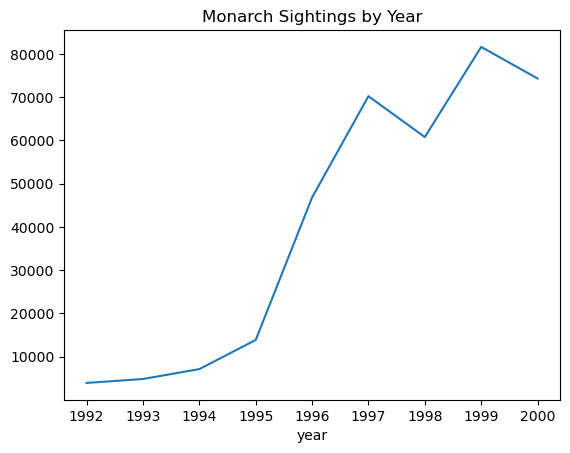

In [38]:
sightings_count_by_year.plot(kind='line', title= 'Monarch Sightings by Year')

<Figure size 1400x800 with 0 Axes>

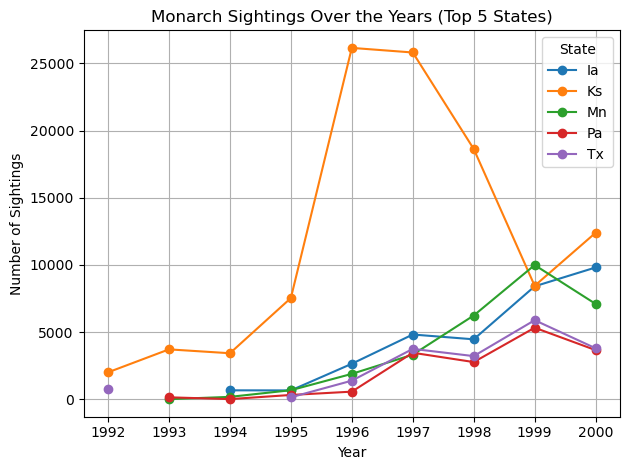

In [40]:
import matplotlib.pyplot as plt

# Aggregate sightings count for each state across all years
state_sightings_total = monarch_sightings.groupby('stateProvince').size().sort_values(ascending=False)

# Select top 5 states
top_5_states = state_sightings_total.head(5).index.tolist()

# Filter data to include only sightings from top 5 states
monarch_sightings_top_5_states = monarch_sightings[monarch_sightings['stateProvince'].isin(top_5_states)]

# Group sightings by year and stateProvince and count the occurrences
sightings_by_year_state_top_5 = monarch_sightings_top_5_states.groupby(['year', 'stateProvince']).size()

# Reset index to make 'year' and 'stateProvince' regular columns
sightings_by_year_state_top_5 = sightings_by_year_state_top_5.reset_index(name='count')

# Pivot the table to have 'year' as rows, 'stateProvince' as columns, and 'count' as values
sightings_pivot_top_5 = sightings_by_year_state_top_5.pivot(index='year', columns='stateProvince', values='count')

# Plot the sightings over the years by top 5 states
plt.figure(figsize=(14, 8))
sightings_pivot_top_5.plot(kind='line', marker='o', linestyle='-')
plt.title('Monarch Sightings Over the Years (Top 5 States)')
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.grid(True)
plt.legend(title='State')
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

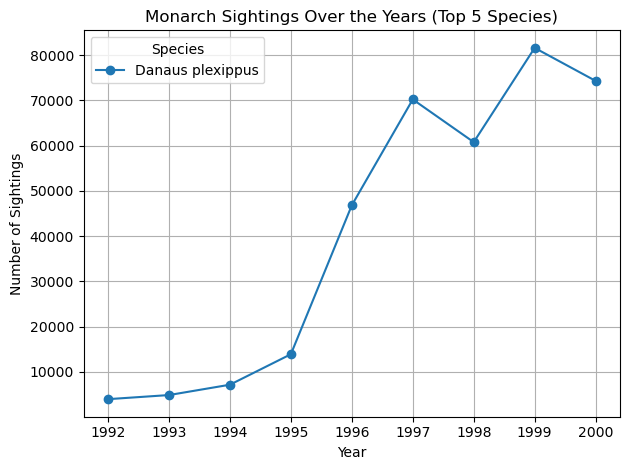

In [41]:
# Group sightings by both year and species and count the occurrences
sightings_by_year_species = monarch_sightings.groupby(['year', 'species']).size()

# Reset index to make 'year' and 'species' regular columns
sightings_by_year_species = sightings_by_year_species.reset_index(name='count')

# Get the top 5 most common species
top_5_species = sightings_by_year_species.groupby('species').sum().nlargest(5, 'count').index

# Filter data to include only sightings of top 5 species
sightings_top_5_species = sightings_by_year_species[sightings_by_year_species['species'].isin(top_5_species)]

# Pivot the table to have 'year' as rows, 'species' as columns, and 'count' as values
sightings_pivot_species = sightings_top_5_species.pivot(index='year', columns='species', values='count')

# Plot the sightings over the years by species
plt.figure(figsize=(14, 8))
sightings_pivot_species.plot(kind='line', marker='o', linestyle='-')
plt.title('Monarch Sightings Over the Years (Top 5 Species)')
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.grid(True)
plt.legend(title='Species')
plt.tight_layout()
plt.show()


In [42]:
# Check the number of unique values for each taxonomic category
unique_counts = {
    'kingdom': monarch_sightings['kingdom'].nunique(),
    'phylum': monarch_sightings['phylum'].nunique(),
    'class': monarch_sightings['class'].nunique(),
    'order': monarch_sightings['order'].nunique(),
    'family': monarch_sightings['family'].nunique(),
    'genus': monarch_sightings['genus'].nunique(),
    'species': monarch_sightings['species'].nunique()
}

print(unique_counts)


{'kingdom': 1, 'phylum': 1, 'class': 1, 'order': 1, 'family': 1, 'genus': 1, 'species': 1}


### There is only one kindgom, phylum etc, so these columns are not helpful

In [45]:
# Dictionary to store the number of unique values for each column
unique_counts = {}

# Iterate over columns
for column in monarch_sightings.columns:
    unique_counts[column] = monarch_sightings[column].nunique()

# Filter columns with only one unique value
single_value_columns = {column: count for column, count in unique_counts.items() if count == 1}

print("Columns with only one unique value:")
print(single_value_columns)

Columns with only one unique value:
{'datasetKey': 1, 'kingdom': 1, 'phylum': 1, 'class': 1, 'order': 1, 'family': 1, 'genus': 1, 'species': 1, 'taxonRank': 1, 'scientificName': 1, 'verbatimScientificName': 1, 'occurrenceStatus': 1, 'publishingOrgKey': 1, 'taxonKey': 1, 'speciesKey': 1, 'basisOfRecord': 1, 'institutionCode': 1, 'collectionCode': 1, 'license': 1, 'recordedBy': 1}


In [46]:
# Drop columns with only one unique value
monarch_sightings_filtered = monarch_sightings.drop(columns=single_value_columns)

# Display the modified DataFrame
print(monarch_sightings_filtered)

            gbifID occurrenceID countryCode stateProvince  decimalLatitude  \
0       2544340937    MW0000006          US            Mo         39.09112   
1       2544340928    MW0000015          US            Mo         39.09112   
2       2544340938    MW0000024          US            Mo         39.09112   
3       2544340973    MW0000033          US            Mo         38.81195   
4       2544340965    MW0000042          US            Mi         42.94114   
...            ...          ...         ...           ...              ...   
363577  2544705756    MW0363544          US            Fl         28.39362   
363578  2544705465    MW0363553          US            Fl         29.02832   
363579  2544705849    MW0363562          US            Fl         27.96585   
363580  2544705998    MW0363571          US            Tx         29.76043   
363581  2544705807    MW0363580          US            Tx         29.50745   

        decimalLongitude  year catalogNumber           lastInte

In [47]:
# Define the file path to save the CSV file
file_path = r"C:\Users\12039\Documents\Capstone Project\Monarchs\monarch_sightings_filtered.csv"

# Save the modified DataFrame to a CSV file
monarch_sightings_filtered.to_csv(file_path, index=False)

print(f"DataFrame saved to {file_path}")

DataFrame saved to C:\Users\12039\Documents\Capstone Project\Monarchs\monarch_sightings_filtered.csv


In [49]:
monarch_sightings_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363582 entries, 0 to 363581
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   gbifID            363582 non-null  int64  
 1   occurrenceID      363582 non-null  object 
 2   countryCode       363582 non-null  object 
 3   stateProvince     363582 non-null  object 
 4   decimalLatitude   363582 non-null  float64
 5   decimalLongitude  363582 non-null  float64
 6   year              363582 non-null  int64  
 7   catalogNumber     363582 non-null  object 
 8   lastInterpreted   363582 non-null  object 
 9   issue             363582 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 27.7+ MB


In [50]:
# Specify which object columns to convert to categorical
columns_to_convert = ['countryCode', 'stateProvince', 'lastInterpreted', 'issue']

# Convert specified object columns to categorical
for column in columns_to_convert:
    monarch_sightings_filtered[column] = monarch_sightings_filtered[column].astype('category')

In [51]:
monarch_sightings_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363582 entries, 0 to 363581
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   gbifID            363582 non-null  int64   
 1   occurrenceID      363582 non-null  object  
 2   countryCode       363582 non-null  category
 3   stateProvince     363582 non-null  category
 4   decimalLatitude   363582 non-null  float64 
 5   decimalLongitude  363582 non-null  float64 
 6   year              363582 non-null  int64   
 7   catalogNumber     363582 non-null  object  
 8   lastInterpreted   363582 non-null  category
 9   issue             363582 non-null  category
dtypes: category(4), float64(2), int64(2), object(2)
memory usage: 18.7+ MB


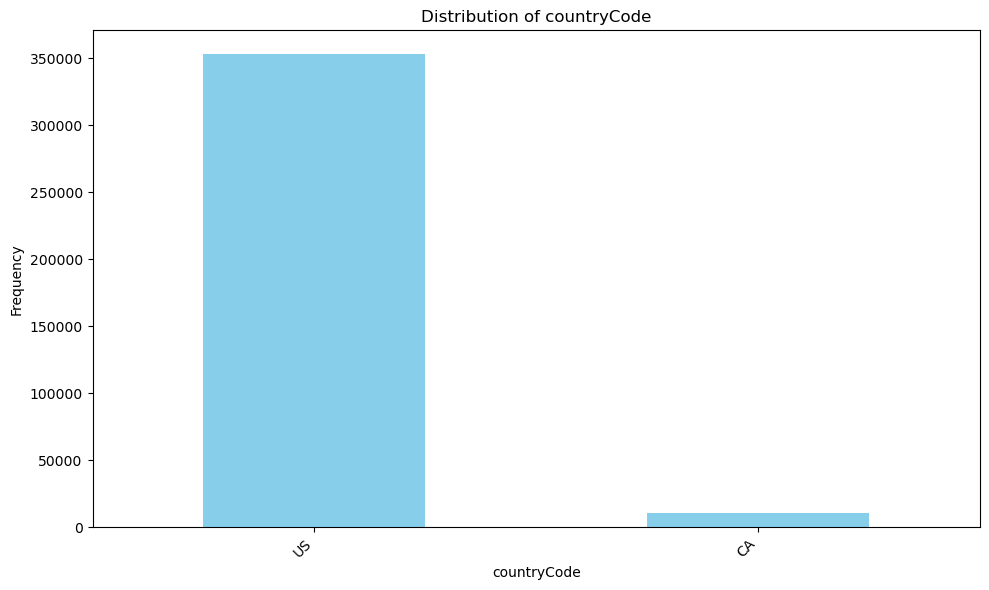

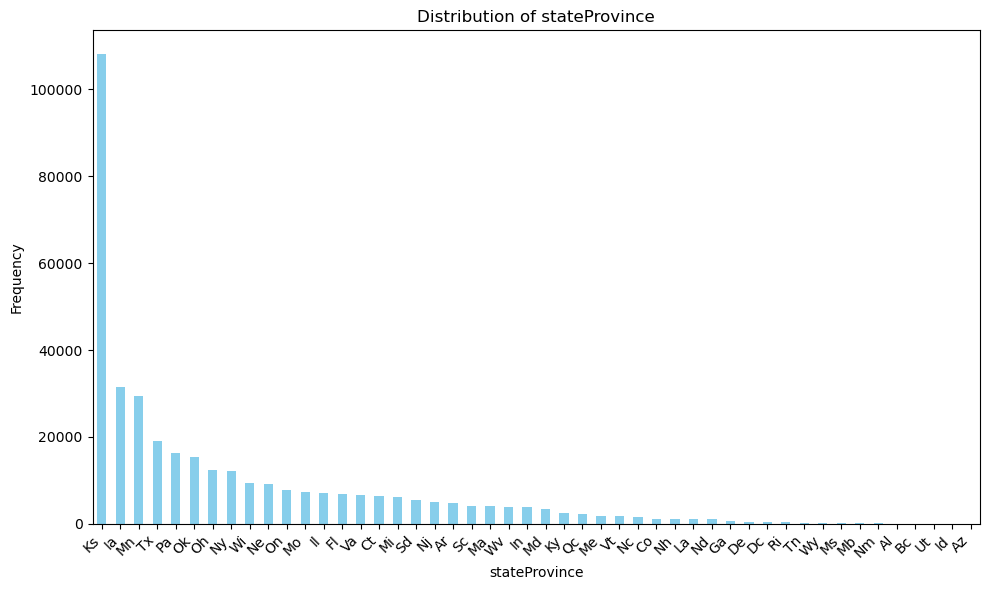

In [ ]:
# Define a function to create bar plots for categorical variables
def plot_categorical_distribution(column_name):
    plt.figure(figsize=(10, 6))
    monarch_sightings_filtered[column_name].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plot distribution for countryCode
plot_categorical_distribution('countryCode')

# Plot distribution for stateProvince
plot_categorical_distribution('stateProvince')

# Plot distribution for lastInterpreted
plot_categorical_distribution('lastInterpreted')

# Plot distribution for issue
plot_categorical_distribution('issue')


### Seasonal Variations

In [ ]:
# Seasonal Variations in Sightings
# Extract month from the 'lastInterpreted' column
monarch_sightings_filtered['lastInterpreted'] = pd.to_datetime(monarch_sightings_filtered['lastInterpreted'])
monarch_sightings_filtered['month'] = monarch_sightings_filtered['lastInterpreted'].dt.month

# Aggregate sightings by month
sightings_by_month = monarch_sightings_filtered.groupby('month').size()

# Plot sightings by month
plt.figure(figsize=(12, 6))
sightings_by_month.plot(kind='bar', color='green')
plt.title('Seasonal Variations in Monarch Sightings')
plt.xlabel('Month')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()